In [2]:
# dataset

import pandas as pd

df = pd.read_excel("dataset_competition.xlsx")

In [3]:
print(df)

            Year Jurisdiction                Category       Type  \
0      2020-2021          ACT               Biosolids  Biosolids   
1      2020-2021          ACT               Biosolids  Biosolids   
2      2020-2021          ACT               Biosolids  Biosolids   
3      2020-2021          ACT               Biosolids  Biosolids   
4      2020-2021          ACT               Biosolids        NaN   
...          ...          ...                     ...        ...   
71491  2006-2007           WA  Unclassified materials        NaN   
71492  2006-2007           WA  Unclassified materials        NaN   
71493  2006-2007           WA  Unclassified materials        NaN   
71494  2006-2007           WA  Unclassified materials        NaN   
71495  2006-2007           WA  Unclassified materials        NaN   

      Classification Total type Stream                  Management  \
0               Type        NaN    C&I              Other disposal   
1               Type        NaN    C&I     

Visualizations

*** SOME SAMPLE VISUALIZATIONS, WE CAN CHANGE THE VISUALIZATIONS WE WANT LATER

In [4]:
# some simple visualizations here, we can discuss and change the visualizations we want

import pandas as pd


grouped_df = df.groupby('Category')['Tonnes'].sum().reset_index()



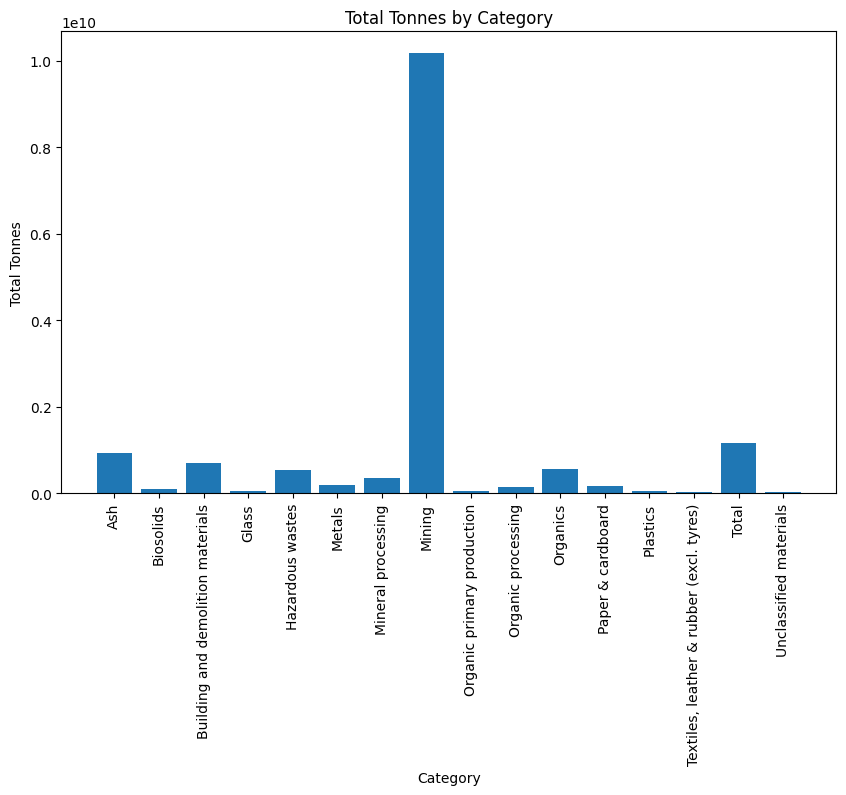

In [8]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named grouped_df
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Category'], grouped_df['Tonnes'])
plt.xlabel('Category')
plt.ylabel('Total Tonnes')
plt.title('Total Tonnes by Category')
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.show()


**Hypothesis Testing**



Hypothesis Testing 1 - Does the annual waste production significantly change over time in the dataset?

Null Hypothesis (HO)
There is no significant difference in the mean 'Tonnes' of waste between different 'Years' in your dataset.
The annual waste production remains the same over time, and any observed differences in the mean "Tonnes" of waste between different years are due to random variation or chance.

In [10]:

import scipy.stats as stats

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*[group['Tonnes'] for name, group in df.groupby('Year')])

# Choose a significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean 'Tonnes' of waste between different 'Years'.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean 'Tonnes' of waste between different 'Years'.")


Reject the null hypothesis: There is a significant difference in the mean 'Tonnes' of waste between different 'Years'.


Hypothesis Testing 2 - Does the "Classification" of waste have an impact on the "Management" method used for waste disposal?

Hypothesis:
  - Null Hypothesis (HO): Classification of waste does not impact the managemention method


In [9]:


# Create a contingency table
contingency_table = pd.crosstab(df['Classification'], df['Management'])

# Perform the Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Choose a significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Classification and Management.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Classification and Management.")


Reject the null hypothesis: There is a significant association between Classification and Management.


Hypothesis 3 -


In [12]:


# Perform one-way ANOVA to compare means of "Tonnes" across different "Management" categories
anova_result = stats.f_oneway(*[group['Tonnes'] for name, group in df.groupby('Management')])

# Choose a significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean 'Tonnes' across different 'Management' categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean 'Tonnes' across different 'Management' categories.")


Reject the null hypothesis: There is a significant difference in the mean 'Tonnes' across different 'Management' categories.


Correlation Analysis

Correlation 1: Correlation between the waste produced and the waste management method used

In [16]:


# Perform one-way ANOVA to compare "Tonnes" across different "Category" groups
anova_result = stats.f_oneway(*[df['Tonnes'][df['Category'] == category] for category in df['Category'].unique()])

# Choose a significance level (alpha)
alpha = 0.05

# Compare p-value to alpha
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in 'Tonnes' across different 'Category' groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in 'Tonnes' across different 'Category' groups.")


Reject the null hypothesis: There is a significant difference in 'Tonnes' across different 'Category' groups.


Predictive Modelling

Recommendations for better waste Management